In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Step1
def move_vector_closer_to_largest_distribution(X,p):
  t = np.dot(X,p)/np.dot(p,p.T)
  p_new = np.dot(X.T,t)/np.dot(t.T,t)
  p_new = p_new/np.sqrt(np.dot(p_new.T, p_new))
  t_new = np.dot(X, p_new)
  diff = t_new - t
  diff_t = np.square(np.dot(diff, diff.T))
  return p_new, diff_t

Xとpの様子を確認するための以下の描画関数を実装する

In [ ]:
#step2
def plot_matrix_and_vector(X,p=None,lim=None):
  fig= plt.figure(figsize=[5,5])
  ax = fig.add_subplot(1,1,1)
  ax.plot(X[:,0],X[:,1],'r.')
  #Xは赤点で表示
  if p is not None:
    ax.plot([0,p[0]],[0,p[1]],'b')
  #pと原点の間に青線を引く
  if lim is not None:
    ax.set_xlim(lim[0], lim[1])
  #横軸の表示範囲
    ax.set_ylim(lim[0],lim[1])
  #縦軸の表示範囲
  plt.show()

3.以下の処理によって50行2列からなる行列Xおよびp=[1,0]を作成せよ。

In [ ]:
#step3
import numpy as np
num_sample =50
X = np.zeros([num_sample,2])
X[:,0] = np. random. randn(X.shape[0])
X[:,1] = X[:,0]*0.5
X[:,0] +=np.random.randn(X.shape[0])*0.3
X[:,1] += np.random.randn(X.shape[0])* 0.3
X=X-np.mean(X,axis=0) #平均値がとなるようにシフト
p= np.array([1,0])

step2で作成した描画関数を使用する

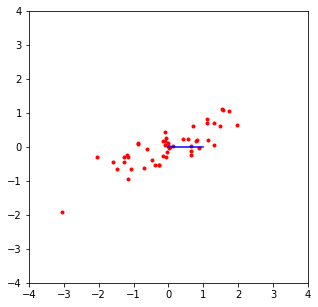

In [ ]:
#step4
plot_matrix_and_vector(X,p,[-4,4])

1で作成した処理を複数回実行してpを更新するごとに、Xの分散の大きな方向にpが移動すること を確認せよ。更新後のp、誤差diff,も確認する。

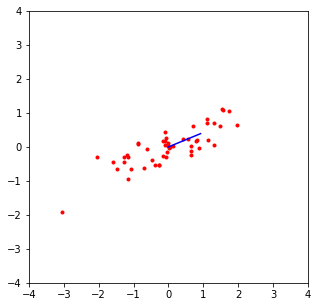

p = [0.92064645 0.39039738]
diff_t = 1.2660269291096957


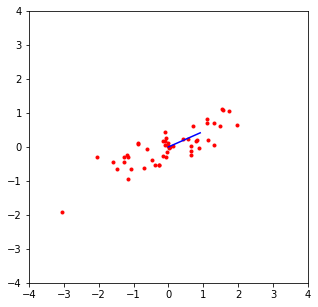

p = [0.91032977 0.41388369]
diff_t = 6.743447650913799e-06


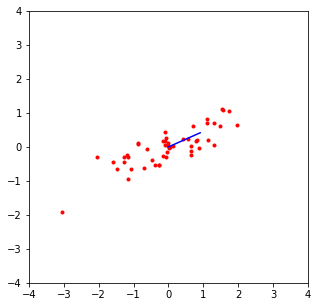

p = [0.90969397 0.41527929]
diff_t = 8.558276802022016e-11


In [ ]:
#step5
#更新1回目
p,diff_t=move_vector_closer_to_largest_distribution(X,p)
plot_matrix_and_vector(X,p,[-4,4])
print('p = {}'.format(p))
print('diff_t = {}'. format(diff_t))
#更新2回目
p,diff_t=move_vector_closer_to_largest_distribution(X,p)
plot_matrix_and_vector(X,p,[-4,4])
print('p =',p)
print('diff_t =',diff_t)
#更新3回目
p,diff_t =move_vector_closer_to_largest_distribution(X,p)
plot_matrix_and_vector(X,p,[-4,4])
print('p =',p)
print('diff_t =',diff_t)

誤差diff,が指定した許容誤差以下になるまでpを更新する処理を実装する

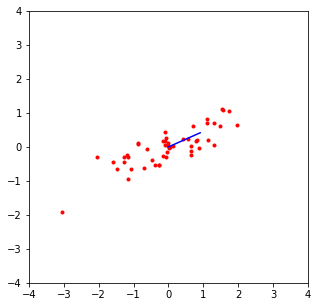

p = [0.90969397 0.41527929]
diff_t = 8.558276802022016e-11


In [ ]:
#step6
p=np.array([1,0])
#pを初期化
tolerance=1e-6
#誤差の許容量
diff_t=tolerance+1
#tolerance以上の適当な値で初期化
#誤差diff_tがtolerance以下になるまで更新処理を実行
while diff_t > tolerance:
  p,diff_t = move_vector_closer_to_largest_distribution(X,p)
#更新後のpを確認
plot_matrix_and_vector(X,p,[-4,4])
print('p =',p)
print('diff_t =',diff_t)

分布の大きな方向にベクトルが移動していることを確認せよ。 以上の処理によって得られたpが、Xの最も分散が大きな方向の軸（第一主成分軸）となる。

 7.以下の処理によってXから第一主成分方向の成分を除去した残差をEとする。

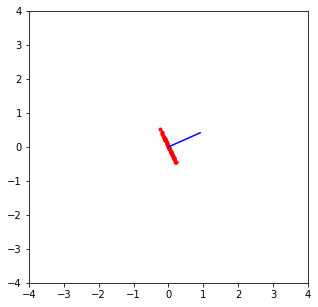

In [ ]:
#step7
t=np.dot(X,p)
E=X-np.dot(t.reshape(-1,1),p.reshape(1,-1))
plot_matrix_and_vector(E,p,[-4,4])

第一主成分軸に直交する成分のみが残ることが分かる

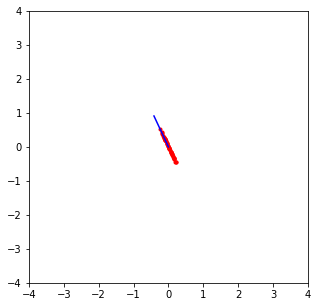

p2 = [-0.41527929  0.90969397]
diff_t = 1.3389331389000148e-62


In [ ]:
#step8(step6と同じく(Xを代わりに))
p2=np.array([0,1])
tolerance=1e-6
#誤差の許容量
diff_t=tolerance+1
#tolerance以上の適当な値で初期化
#誤差diff_tがtolerance以下になるまで更新処理を実行
while diff_t > tolerance:
  p2,diff_t = move_vector_closer_to_largest_distribution(E,p2)
#更新後のpを確認
plot_matrix_and_vector(E,p2,[-4,4])
print('p2 =',p2)
print('diff_t =',diff_t)

一連の処理を利用しやすくするため、主成分分析を行うクラスを実装する。

In [ ]:
#step9
import copy
class myPCA:
  def __init__(self, n_components=None,tolerance=1e-6):
    self.n_components = n_components
    self.tolerance =tolerance

  def fit(self,X):
    if self.n_components is None:
      self.n_components = X.shape[1]
    E=copy.deepcopy(X)
    self.P = np.zeros((E.shape[1], self.n_components))
    for ii in range(self.n_components):
      #p=[1,0,..·,0]の作成
      p=np.zeros(E.shape[1])
      p[0]=1
      #写像誤差diff_tが十分に小さくなるまでpを更新
      diff_t=self.tolerance+1
      while diff_t>self.tolerance:
        p,diff_t = move_vector_closer_to_largest_distribution(E,p)
      #残差Eを更新
      t=np.dot(X,p)
      E= E-np.dot(t.reshape(-1,1),p.reshape(1,-1))
      self.P[:,ii]=p

  def transform(self,X):
    return np.dot(X,self.P)

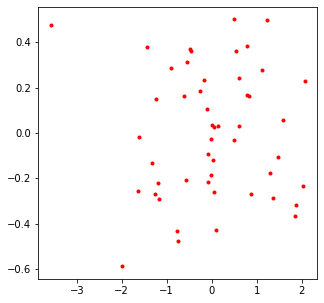

In [ ]:
#step10 作成したクラスを用いて以下の処理を行う
model = myPCA()
model.fit(X)
pc = model.transform(X)
plot_matrix_and_vector(pc)

scikit-learn には特異値分解を用いた主成分分析が実装されている。scikit-learn による主成分分析 は以下の処理で実行可能である。10の結果と比較する。

In [ ]:
#step11 sci-kit learn
!pip install scikit-learn==1.0.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


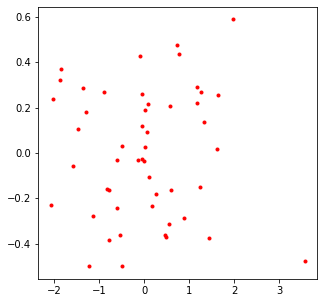

In [ ]:
from sklearn.decomposition import PCA
model_sk = PCA(n_components=2)
model_sk.fit(X)
pc_sk = model_sk.transform(X)
plot_matrix_and_vector(pc_sk)

グラフによれば、結果は一致していない。


In [ ]:
#step12
#irisデータセットをロードする
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

成分ごとのクラスの分布を確認するための以下の描画関数を実表する

In [ ]:
#step13
def plot_class_components(X,y,c,axis=(0,1)):
  fig =plt.figure(figsize=[5,5])
  ax=fig.add_subplot(1,1,1)
  for val,name, marker in c:
    ax.plot(X[y==val,axis[0]],X[y==val,axis[1]],marker,label=name)
  ax.legend()
  plt.show()

元データを可視化する

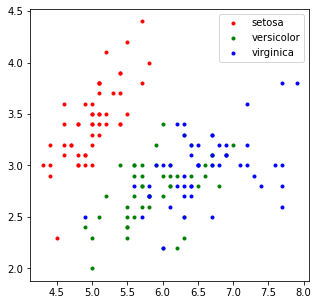

In [ ]:
#step14
c=[[0,target_names[0],'r.'], [1, target_names[1], 'g.'], [2, target_names[2],'b.']]
plot_class_components(X,y,c,axis=(0,1))

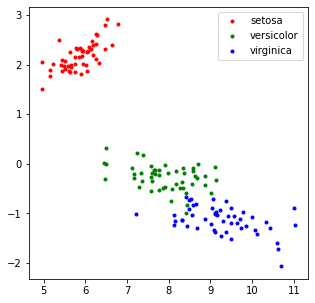

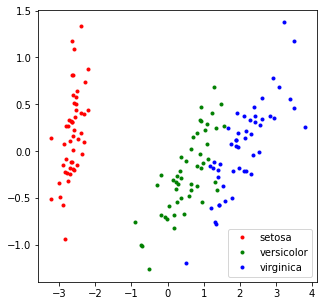

In [ ]:
#step15
model =myPCA()
model.fit(X)
pc=model.transform(X)
plot_class_components(pc,y,c,axis=(0,1))
model_sk=PCA(n_components=4)
model_sk.fit(X)
pc_sk = model_sk.transform(X)
plot_class_components(pc_sk,y,c,axis=(0,1))

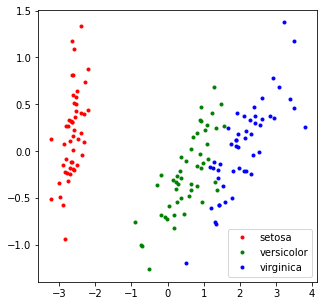

In [ ]:
#step16
mean_X=np.mean(X,axis=0)
X_centered =X - mean_X
model=myPCA()
model.fit(X_centered)
pc =model.transform(X_centered)
plot_class_components(pc,y,c,axis=(0,1))

Standard scalerでデータセットを処理すると、MY_PCA()とSci-kit learnからの分類結果は同じになる訳である。
